In [588]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [589]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [590]:
def GetLaguerre(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1-x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
    return sym.expand(poly,x)

In [591]:
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [592]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))
        except ZeroDivisionError:
            print('Zero Division')
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

In [593]:
def GetRoots(f,df,x,tolerancia = 10):
    Roots = np.array([])
    for i in x:
        root = GetNewton(f,df,i)
        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append(Roots, croot)
    Roots.sort()
    return Roots

In [594]:
def GetAllRootsGLag (n):
    xn = np.linspace(0,n+((n-1)*np.sqrt(n)),200)
    Laguerre = []
    DLaguerre = []
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    poly = sym.lambdify([x],Laguerre[i],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[i],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    return Roots

In [595]:
def GetWeightsGLag(n):
    Roots = GetAllRootsGLag(n)
    Laguerre = []
    for i in range(n+2):
        Laguerre.append(GetLaguerre(i,x))
    poly = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/(((n+1)**2)*(poly(Roots)**2))
    return Weights

In [596]:
GetWeightsGLag(10)

array([3.08441118e-01, 4.01119929e-01, 2.18068288e-01, 6.20874561e-02,
       9.50151697e-03, 7.53008389e-04, 2.82592335e-05, 1.83956482e-09])

In [597]:
def GetHermite(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = x
    else:
        poly = ((2*x)*GetHermite(n-1,x)-2*(n-1)*GetHermite(n-2,x))
    return sym.expand(poly,x)

In [598]:
def GetDHermite(n,x):
    Pn = GetHer(n,x)
    return sym.diff(Pn,x,1)

In [599]:
def GetAllRootsGHer (n):
    xn = np.linspace(-np.sqrt(4*n+1),np.sqrt(4*n+1),100)
    
    Hermite = []
    DHermite = []
    
    for i in range(n+1):
        Hermite.append(GetHermite(i,x))
        DHermite.append(GetDHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [600]:
def GetWeightsGHer(n):

    Roots = GetAllRootsGHer(n)

    Hermite = []
    
    for i in range(n):
        Hermite.append(GetHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n-1],'numpy')
    Weights = 2**(n-1)*np.math.factorial(n)*np.sqrt(np.pi)/((n)**2*poly(Roots)**2)
    
    return Weights

In [601]:
T = np.linspace(100, 800, 10)
m = 1
v = np.linspace(0, 600, 600)
r = 8.314

In [602]:
def P (v, T, M = m, R = r):
    return 4*np.pi*((M/(2*np.pi*R*T))**(3/2))*v**2*np.exp(-(M*v**2)/(2*np.pi*R*T))

Text(0.5, 1.0, 'Probabilidad de que una molécula tenga una velocidad \n dependiendo de la temperatura')

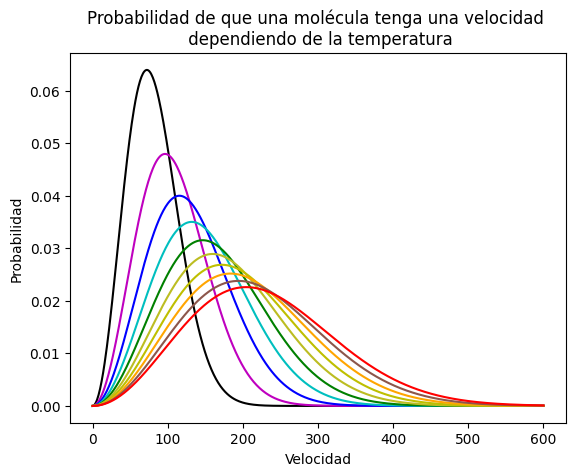

In [603]:
colores = []
for i in T:
    proba = P(v, i)
    if 'k' not in colores:
        plt.plot(v, proba, color = 'k')
        colores.append('k')
    elif 'm' not in colores:
        plt.plot(v, proba, color = 'm')
        colores.append('m')
    elif 'b' not in colores:
        plt.plot(v, proba, color = 'b')
        colores.append('b')
    elif 'c' not in colores:
        plt.plot(v, proba, color = 'c')
        colores.append('c')
    elif 'g' not in colores:
        plt.plot(v, proba, color = 'g')
        colores.append('g')
    elif 'tab:olive' not in colores:
        plt.plot(v, proba, color = 'tab:olive')
        colores.append('tab:olive')
    elif 'y' not in colores:
        plt.plot(v, proba, color = 'y')
        colores.append('y')
    elif 'orange' not in colores:
        plt.plot(v, proba, color = 'orange')
        colores.append('orange')
    elif 'tab:brown' not in colores:
        plt.plot(v, proba, color = 'tab:brown')
        colores.append('tab:brown')
    else:
        plt.plot(v, proba, color = 'r')
        colores.append('r')
plt.xlabel("Velocidad")
plt.ylabel("Probabilidad")
plt.title("Probabilidad de que una molécula tenga una velocidad \n dependiendo de la temperatura")

Como podemos ver, a mayor temperatura (Visible gracias al cambio de color, negro siendo la más baja y rojo siendo la más alta) mayor la velocidad promedio, pero menor su probabilidad máxima comparada con una temperatura menor. Es decir, a más temperatura, más extenso el rango de velocidades posibles para la partícula

In [604]:
T = np.linspace(100, 800, 10)
m = 1
r = 8.314

In [605]:
def Probabilidad_Para_Gauss_Laguerre(v, T, M = m, R = r):
    return (4*np.pi*((M/(2*np.pi*R*T))**(3/2)))*v**2


Lo lógico es que la expresión sea (4 x np.pi x ((M/(2 x np.pi x R x T x v^2))^(3/2))) x v^2, ya que para que la cuadratura de Gauss-Laguerre funcione, se necesita que haya una función del tipo e^-t x f(t), y en nuestro caso ese t sería (M x v^2)/(2 x np.pi x R x T), pero ocurre un error de cálculo al utilizar esta expresión.

In [606]:
def Vavg(v, T):
    return v*Probabilidad_Para_Gauss_Laguerre(v, T)

In [607]:
Vitesses_Moyennes = []
weights = GetWeightsGLag(10)
v = np.linspace(0, 600, len(weights))
print(weights)
for i in T:
    Vp = 0
    Vp = sum(Vavg(v, i)*weights)
    Vitesses_Moyennes.append(Vp)

[3.08441118e-01 4.01119929e-01 2.18068288e-01 6.20874561e-02
 9.50151697e-03 7.53008389e-04 2.82592335e-05 1.83956482e-09]


In [608]:
Vavgteórica = np.array([])
for i in T:
    Vavgteórica = np.append(Vavgteórica, np.sqrt((8*r*i)/(np.pi*m)))

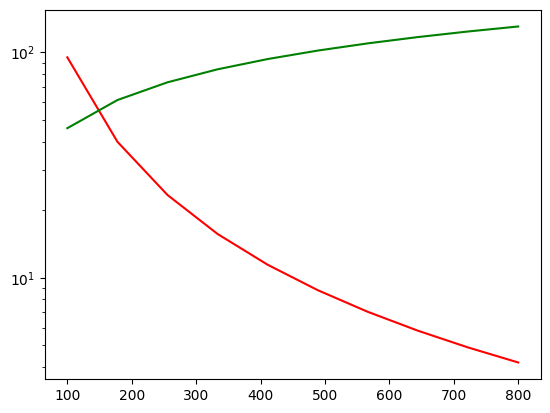

In [609]:
plt.plot(T, Vitesses_Moyennes, color ='r')
plt.plot(T, Vavgteórica, color = 'g')
plt.yscale('log')

In [610]:
def Vrms(v, T):
    return v**2*Probabilidad_Para_Gauss_Laguerre(v, T)

In [611]:
Vitesses_Moyennes = []
weights = GetWeightsGLag(10)
v = np.linspace(0, 600, len(weights))
print(weights)
for i in T:
    Vp = 0
    #for j in range(len(weights)):
    Vp = sum(Vrms(v, i)*weights)
    print (Vp, Vrms(v, i))
    Vitesses_Moyennes.append(np.sqrt(Vp))

[3.08441118e-01 4.01119929e-01 2.18068288e-01 6.20874561e-02
 9.50151697e-03 7.53008389e-04 2.82592335e-05 1.83956482e-09]
21305.11440824334 [0.00000000e+00 1.79654406e+03 2.87447050e+04 1.45520069e+05
 4.59915279e+05 1.12284004e+06 2.32832110e+06 4.31350229e+06]
8988.095140977655 [0.00000000e+00 7.57917025e+02 1.21266724e+04 6.13912791e+04
 1.94026758e+05 4.73698141e+05 9.82260465e+05 1.81975878e+06]
5215.018829384897 [0.00000000e+00 4.39754085e+02 7.03606537e+03 3.56200809e+04
 1.12577046e+05 2.74846303e+05 5.69921295e+05 1.05584956e+06]
3500.7875254869614 [0.00000000e+00 2.95202312e+02 4.72323699e+03 2.39113873e+04
 7.55717919e+04 1.84501445e+05 3.82582197e+05 7.08780752e+05]
2555.907007967014 [0.00000000e+00 2.15525693e+02 3.44841109e+03 1.74575812e+04
 5.51745775e+04 1.34703558e+05 2.79321298e+05 5.17477190e+05]
1970.9182917447547 [0.00000000e+00 1.66196786e+02 2.65914858e+03 1.34619397e+04
 4.25463773e+04 1.03872992e+05 2.15391035e+05 3.99038484e+05]
1579.4008620247773 [0.0000000

In [612]:
Vrmsteórica = np.array([])
for i in T:
    Vrmsteórica = np.append(Vrmsteórica, np.sqrt((3*r*i)/(m)))

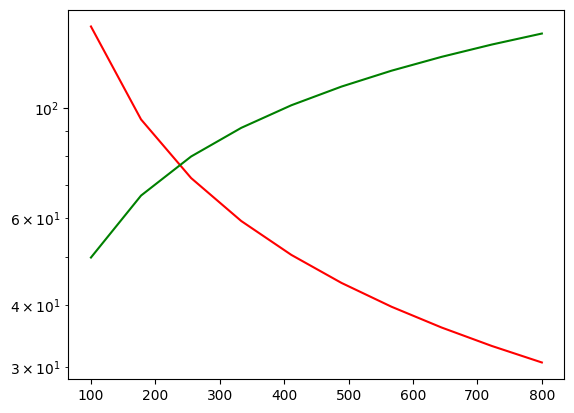

In [613]:
plt.plot(T, Vitesses_Moyennes, color ='r')
plt.plot(T, Vrmsteórica, color = 'g')
plt.yscale('log')